In [1]:
from jax import random as jran
ran_key = jran.PRNGKey(0)

In [2]:
from diffprof.diffprofpop import get_singlemass_params_p50
from diffprof.dpp_predictions import get_predictions_from_singlemass_params_p50
from diffprof.dpp_opt import get_u_param_grids

In [4]:
n_t = 30
tarr = np.linspace(1, 13.8, n_t)

lgm0 = 13.0
singlemass_dpp_params = get_singlemass_params_p50(lgm0)

In [13]:
p50_arr = np.linspace(0, 1, 50)
u_param_grids = get_u_param_grids(ran_key, 30_000)
u_be_grid, u_lgtc_bl_grid = u_param_grids
args = (singlemass_dpp_params, tarr, p50_arr, u_be_grid, u_lgtc_bl_grid)
dpp_preds = get_predictions_from_singlemass_params_p50(*args)
avg_log_conc_p50_dpp = dpp_preds[0]
avg_log_conc_p50_dpp.shape

(50, 30)

In [9]:
n_p = 400

p50 = 0.5
ip = np.searchsorted(p50_arr, p50)
p50 = p50_arr[ip]

p50_sample = np.zeros(n_p) + p50


In [11]:
from diffprof.mc_diffprofpop import mc_halo_population_singlemass

lgc_sample = mc_halo_population_singlemass(
    ran_key, tarr, p50_sample, singlemass_dpp_params
)
avg_log_conc_p50_mc = np.mean(lgc_sample, axis=0)


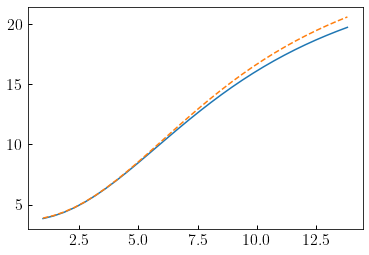

In [18]:
fig, ax = plt.subplots(1, 1)

__=ax.plot(tarr, 10**avg_log_conc_p50_mc)
__=ax.plot(tarr, 10**avg_log_conc_p50_dpp[ip, :], '--')


In [17]:
np.max(avg_log_conc_p50_dpp[ip, :]/avg_log_conc_p50_mc)

DeviceArray(1.0143707, dtype=float32)